In [9]:
from sklearn.datasets import load_diabetes
import pandas as pd

# Load dataset
data = load_diabetes()

# Convert to DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df["Target"] = data.target  # Add target column

# Display first few rows
print(df)


          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  Target  
0   -0.002592  0.019907 -0.0176

📊 MSE Before Training: 29405.4206
📊 MSE After Training: 2874.3221
📉 Change in MSE: 26531.0985

🔵 Prediction Before Training: 3.77
🩺 Prediction After Training: 70.3
✅ Patient is at low risk of diabetes


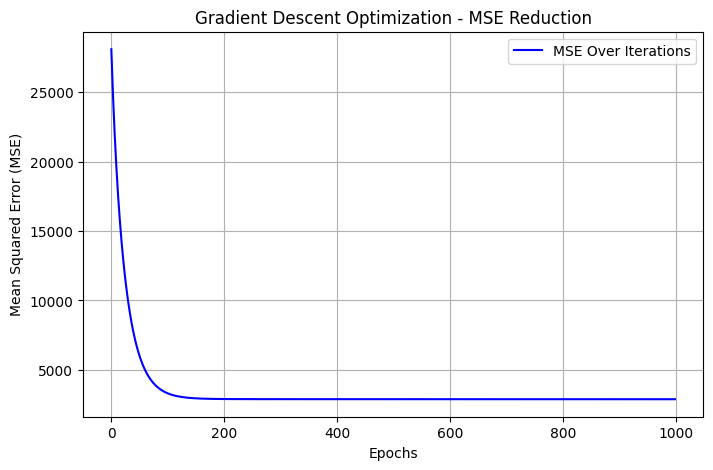

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load the dataset
file_path = "/Users/rohith/Downloads/diabetes.tab.txt"
df = pd.read_csv(file_path, delimiter="\t")  # Load tab-separated file

# Extract features and target
X = df.iloc[:, :-1].values  # Features (first 10 columns)
y = df.iloc[:, -1].values   # Target (last column: diabetes progression)

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Initialize parameters for gradient descent
m, n = X.shape
W = np.random.randn(n)  # Weights
b = np.random.randn()   # Bias
alpha = 0.01  # Learning rate
epochs = 1000

# Function to compute Mean Squared Error
def compute_mse(X, y, W, b):
    y_pred = np.dot(X, W) + b
    mse = mean_squared_error(y, y_pred)
    return mse

# Compute initial MSE before training
mse_before = compute_mse(X, y, W, b)

# Gradient Descent Function with MSE tracking
def gradient_descent(X, y, W, b, alpha, epochs):
    m = len(y)
    mse_history = []  # Store MSE values

    for _ in range(epochs):
        y_pred = np.dot(X, W) + b
        error = y_pred - y

        # Compute gradients
        dW = (2/m) * np.dot(X.T, error)
        db = (2/m) * np.sum(error)

        # Update parameters
        W -= alpha * dW
        b -= alpha * db

        # Track MSE at each step
        mse_history.append(mean_squared_error(y, np.dot(X, W) + b))

    return W, b, mse_history

# Model prediction function
def predict(user_input, W, b):
    user_input = np.array(user_input).reshape(1, -1)
    user_input = scaler.transform(user_input)  # Scale input
    prediction = np.dot(user_input, W) + b  # Compute prediction
    return round(prediction[0], 2)

# Hardcoded input values
user_data = [41,1,21.6,87,183,103.2,70,3,3.8918,69]  

# Predict before training
prediction_before = predict(user_data, W, b)

# Train model using gradient descent
W, b, mse_history = gradient_descent(X, y, W, b, alpha, epochs)

# Compute MSE after training
mse_after = compute_mse(X, y, W, b)

# Predict after training
prediction_after = predict(user_data, W, b)

# Print results
print(f"📊 MSE Before Training: {mse_before:.4f}")
print(f"📊 MSE After Training: {mse_after:.4f}")
print(f"📉 Change in MSE: {mse_before - mse_after:.4f}\n")

print(f"🔵 Prediction Before Training: {prediction_before}")
print(f"🩺 Prediction After Training: {prediction_after}")

# Set a threshold for diabetes risk
if prediction_after > 140:  # Adjust threshold based on dataset analysis
    print("⚠️ Patient may have diabetes")
else:
    print("✅ Patient is at low risk of diabetes")

# Plot MSE over epochs
plt.figure(figsize=(8, 5))
plt.plot(range(epochs), mse_history, label="MSE Over Iterations", color="blue")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Gradient Descent Optimization - MSE Reduction")
plt.legend()
plt.grid(True)
plt.show()
